### Maxwell Pickard, A15786623

## Part 1: The Normal Equation

Given $A\in\mathbb{C^{mxn}}$ and $y\in\mathbb{C^m}$ show that $\hat{x}$ solves $\min_{x}\|y-Ax\|_{2}$ if it is a solution to the following set of linear equations: $$A^HAy=A^Hx$$

### (a) The Normal Equation Always has a Solution

First, let $B=A^HA$ and $C=A^Hy$. Then $C=Bx$.  

$C=Bx$ will have a solution when $C\in Range(B)=Range(A^HA)$.  

But $C=A^Hy\implies C\in Range(A^H)$.  

If $Range(A^HA)=Range(A^H)$ then $C\in Range(A^HA)$ and $C\in Range(A^H)$ will always be true  
  
Let $v\in Range(A^HA)$ and $u$ be a vector $\in\mathbb{C}^n$. Then:   

$v = A^Hu = A^HAu = A^Hz$ where $z = Au\implies v\in Range(A^H)\implies Range(A^HA)\subseteq Range(A^H)$  
  
From Homework 2, we know $rank(A^HA)=rank(A^H)$  
  
Given $Range(A^HA)\subseteq range(A^H)$ and $rank(A^HA)=rank(A^H)$, we can conclude that $C\in Range(A^HA)$ and $C\in Range(A^H)$ will always be true  
  
Thus, $A^Hy\in Range(A^H)$ and $A^Hy\in Range(A^HA)\implies A^Hy=A^HAx$ will always have a solution

### (b) The Normal Equation can have Infinite Solutions

From part (a), we know that the normal equations ($A^HAy=A^Hx$) will always have at least one solution x.   

If A is rank deficient $\implies\exists v\neq 0, v\in\mathbb{R ^n}$ s.t. $Av=0$  
  
For all $\alpha\in\mathbb{R}$, $x+\alpha v$ is also a solution to the normal equation.  
  
Therefore, there can be infinite solutions

### (c) Singular Value Decomposition

Suppose $rank(A)<n$. Then finding a solution to the normal equation is much harder because A will not be invertible.  
  
One way to work around this is to use the pseudo-inverse of A, denoted $A^\dagger$.  
  
$A^\dagger = (A^HA)^{-1}A^H$ when A is full rank, but because A is not full rank, we can instead use Singular Value Decompostion (SVD) to find $A^\dagger$  
  
Let $A=U\Sigma V^H$ be the singular value decompostion of $A$ 
  
Let $rank(A)=r$, then $A^\dagger=V\Sigma^{-1}U^H$, where $U\in\mathbb{C^{mxr}}$, $\Sigma\in\mathbb{C^{rxr}}$, $V\in\mathbb{C^{nxr}}$  
  
Using this method, the pseudo-inverse of $A^TA$ can be found and used to calculate the solution to the normal equation. 

# Part 2: Least Squares Classifier

## Import Packages

In [16]:
import numpy as np
import scipy as sp
from scipy import io
from scipy import linalg
import numpy.ma as ma
import pandas as pd
from matplotlib import pyplot as plt

## Binary Class

In [17]:
# Binary Classifier using Linear Least Squares
class Binary:
        
# Init Binary object
# Takes training set and label set as arguments
# alpha, beta, data, and labels are attributes
# beta -  vector containing all the parameters used in the predicition
# alpha - the first eleement in the beta vector
# data - training dataset, used for child classes
# labels - labels (self-explanitory)
# Uses ls_constants method to derive alpha and beta values

    def __init__(self, X: np.array, Y: np.array):
        (self.alpha, self.beta) = self.ls_constants(X, Y)
        self.data = X
        self.labels = Y

# returns array of signed linear regression results as the integer type'
    def predict(self, test:np.array):
        return np.sign(self.linear_regression(test)).astype(int)

# returns array of values from linear regression using the parameters and alphas from ls_constants'
    def linear_regression(self, test:np.array):
        return test @ self.beta + self.alpha
        
# First, method will create an array of ones and add it as the first column in the data array (A)
# method will then find b_hat solving the normal equation using the pseudo_inverse of A
# The result will be a vector (b_hat), which contains a 'bias' element and the rest of the 
# parameters for linear regression. The bias element will be the first element in the vector, (by construction).
# Method will return the bias element as alpha and the rest of the parameters as beta

    def ls_constants(self, X:np.array, Y:np.array):
        ones = np.ones([len(X), 1])
        A = np.hstack([ones, X])
        b_hat = np.linalg.pinv(A.T@A) @ A.T @ Y
        alpha = b_hat[0]
        beta = b_hat[1:]
        return alpha, beta

# Here is where I would use SVD to find the pseudo-inverse of (A.T @ A). 
# Unfortunately, the np.linalg.svd would not run on my machine due to lack of memory.
# As a result, the np.linalg.pinv is used instead. Included below the Binary class is how would have 
# implemented SVD to find the solution

## SVD Implementation to Solve Normal Equation

Below is the function I would use to calculate the pseudo-inverse to find **beta** and **alpha** in the **ls_constants** function inside the Binary class. It is commented out to avoid errors. This method would replace the use of **np.linalg.pinv**.

In [18]:
'''
def pseudo(self, X:np.array):
    #We want the pseudo-inverse of X.T @ X
    ATA = X.T @ X
    
    #Get U, Sigma, and V.T
    U, Sig, VT = np.linalg.svd(ATA)
    
    #Sig is a vector of the values, so we need to put the values along the diagonal of a matrix
    sigMatrix = np.diag(s)
    
    #Calculate Pseudo-Inverse
    pseu = V.T @ np.inv(Sig) @ U.T
    
    return pseu
'''
print(" ")

## One Versus All (OVA) Class

In [19]:
# Child class that inherits from Binary
class OVA(Binary):

# For a single given input, the predict method will run the linear regression method from the Binary class,
# but instead of returning only ones and negatives ones, it will instead return an array of 10 elements,
# all elements being one or negative one. The argmax will return the index of the location of the single 
# positive 1 as our prediction. This method will return an array of our predictions. 
    
    def predict(self, test: np.array):
        return np.argmax(self.linear_regression(test), axis = 1)
    
# Init OneVsAll object
# OneVsAll will inherit methods from Binary, but for the label inputs, 
#it use the resulting output from the k_classes method within OneVsAll
    
    def __init__(self, X: np.array, Y: np.array):
        super().__init__(X, self.k_classes(Y))
        
# The k_classes method will first extract the unique labels (digits 0 through 9) from the input array of size mx1
# Then, it creates a mx(number of unique labels) matrix, filled with -1.
# It then will iterate over the Y array, and it will set k equal to the value of the element in Y.
# Our for loop goes row by row in the s matrix, and changes the value of the kth column to 1. 
# It will return an nxn (10x10 in our case) array of the individual labels for our classifier
# It esstenially expands the test vector into a matrix of -1s and 1s, with the location of the 
# column index of the positive 1 corresponding the the actual value
    
    def k_classes(self, Y: np.array):
        labels = np.unique(Y)
        output_matrix = np.where(np.zeros((Y.shape[0], len(labels))) == 0, -1, 0)
        for i, k in enumerate(Y):
            output_matrix[i, k] = 1
        return output_matrix

# One Versus One (OVO) Class

In [20]:
class OVO(Binary):
    
#Like we did with the predict method in the OneVsAll class, we rewrite the least squares 
# method of finding the parameters for linear regression. In the Binary class, the ls_constants method
# created alpha and beta for the entire training set at once. Here, we are performing Boolean classification
# between pairs of classes instead of comparing all the classes at once. We also redefine the predict method 
# to compare between two classes. 

# This ls_constants will create 2 different lists of 45 pairs of numbers, where val corresponds to the 
# index i of  the class (i.e. (0,0)) val2 corresponds to val + 1 (val1 = 0, val2 = 1). We create a boolean mask
# of size 60,000x1. The elements of the mask will be "True" if an the element in Y is equal to val1 or val2. 
# temp_array returns an array of size mx1, where m is the number of "True" values  in the mask, and will set 
# an element to 1 if the value of Y at that index is equivalent to val1; else it will be -1. 
# mask and temp are then passed through the ls_constants method from the Binary class to output the required 
# parameters for te pairwise classificaiton. It will repeat this process for every pair of classes 
# (45 total classifiers). The resulting alpha and beta vector are then stored in the empty alpha and beta lists 
# within the method. The method returns alpha and beta as NumPy arrays, alpha being 45x1, and beta 45x784
    
    def ls_constants(self, X:np.array, Y:np.array):
        classes = np.unique(Y)
        alpha = []
        beta = []
        for i, val1 in enumerate(classes):
            for j, val2 in enumerate(classes[i + 1:], i + 1):
                mask = np.logical_or(Y == val1, Y == val2) 
                temp = np.where(Y[mask] == val1, 1, -1)

            # Create a 1x60000 vector with ascending values from 0 to 60000 and transpose it
                v = np.array([range(0,60000)])
                v = v.T

            #Indices from x_train needed
                indices = v[mask]
                        
                (a, b) = super().ls_constants(X[indices], temp)
                alpha.append(a)
                beta.append(b)
                
        return (np.array(alpha), np.array(beta))

    def predict(self, test:np.array):
        classifier = 0
        labels = np.unique(self.labels)
        votes = np.zeros((test.shape[0], labels.shape[0]))
        
    # iterates over all 45 classifiers
        for i, val1 in enumerate(labels):
            for j, val2 in enumerate(labels[i+1:], i+1):
                
                alpha = self.alpha[classifier]
                beta = self.beta[classifier]
                
            # Instead of calling the linear regression method from the Binary class, we hard code the equation
            # because we only want to use the specific alpha and beta parameters corresponding to the classifier 
            # we are using. 
                
                lr_classifier_binary = np.sign(test @ beta + alpha).flatten()

            # Take the signed regression output and create two masks. mask1 take...., 
            # mask1 will take the -1 values as a 0 vote and 1 as a +1 vote
            # mask 2 will take the -1 values as +1 vote because the -1 values correspond 
            # to classiying as the other value. 
                
                mask1 = np.where(lr_classifier_binary == 1, 1, 0)
                mask2 = np.where(lr_classifier_binary == 1, 0, 1)

            # In the ith column (value i), add the values of mask1
            # In the jth column( value j), add the values of mask 2
            
                votes[:, i] += mask1
                votes[:, j] += mask2
                classifier += 1
                
            # Count the total number of 'votes' in each row to the voting matrix 
            # and return the label of the column with the most votes'''

        return np.argmax(votes, axis = 1)

## Error Rate and Confusion Matrix Functions

In [21]:
# To compute the error rate, the error_rate method compares the elements in the 'predicted' and 'actual' arrays
# and counts the instances where they do not match/ It then divdes by the total number of elements in 
# the 'actual' array

def error_rate(predict: np.array, actual: np.array):
    predict = predict.flatten()
    actual = actual.flatten()
    return np.count_nonzero(predict != actual)/ len(actual)

# To create the confusion matrix, the confusion method extracts the labels from the 'actual' array
# and then creates a nxn square matrix of zeroes called 'cmatrix', where n is the number of labels + 1. The 
# 'predict' and 'actual' arrays are then flattened into a 1-dimensional array, called 'predictions' 
# and 'act_vals' respectively. 'predictions' and 'act_vals' are then tupled together in a zip object,
# which is used to iterate over the indices of 'cmatrix'. Finally, the values in the matrix are converted to integers 
# and the matrix is placed in a pandas dataframe and returned.

def confusion(predict: np.array, actual: np.array):
    labels = np.unique(actual)
    cmatrix = np.zeros((labels.shape[0] + 1, labels.shape[0] + 1))
    predictions = predict.flatten()
    act_vals = actual.flatten()
    
    combined = zip(predictions, act_vals)
    #list(combined)
    
    for i, j in combined:
        cmatrix[j, i] += 1   # Add to the correct cell
        cmatrix[-1, -1] += 1 # Add to the total
        cmatrix[j, -1] += 1  # Add to the bottom row
        cmatrix[-1, i] += 1  # Add to the right column
        
    cmatrix = cmatrix.astype(int)       
    
    return pd.DataFrame(cmatrix)

# Implementation of Standard Linear Least Squares (LLS) |Classifier

### Import/Extract Data Sets

In [22]:
data = sp.io.loadmat('mnist.mat')

In [23]:
x_train = data.get('trainX').astype(float)/255
y_train = data.get('trainY').T
x_test = data.get('testX').astype(float)/255
y_test = data.get('testY').T

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000, 1), (10000, 784), (10000, 1))

### Train Least Squares Classifiers and Predict

In [24]:
OneVsAll = OVA(x_train, y_train)
OVAprediction = OneVsAll.predict(x_test)

In [25]:
OneVsOne = OVO(x_train, y_train)
OVOprediction = OneVsOne.predict(x_test)

### Evaluation Metrics of One Versus All Classifiers

In [26]:
error_rate(OVAprediction, y_test)

0.1397

In [27]:
confusion(OVAprediction, y_test)

,0,1,2,3,4,5,6,7,8,9,10
0,944,0,1,2,2,7,14,2,7,1,980
1,0,1107,2,2,3,1,5,1,14,0,1135
2,18,54,813,26,15,0,42,22,37,5,1032
3,4,17,23,880,5,17,9,21,22,12,1010
4,0,22,6,1,881,5,10,2,11,44,982
5,23,18,3,72,24,659,23,14,39,17,892
6,18,10,9,0,22,17,875,0,7,0,958
7,5,40,16,6,26,0,1,884,0,50,1028
8,14,46,11,30,27,40,15,12,759,20,974
9,15,11,2,17,80,1,1,77,4,801,1009


### Evaluation Metrics of One Versus One Classifiers

In [13]:
error_rate(OVOprediction, y_test)

0.0703

In [14]:
confusion(OVOprediction, y_test)

,0,1,2,3,4,5,6,7,8,9,10
0,961,0,1,1,0,6,8,3,0,0,980
1,0,1120,3,3,1,1,4,1,2,0,1135
2,9,18,936,12,10,5,10,10,22,0,1032
3,9,1,18,926,2,20,1,7,21,5,1010
4,2,4,6,1,931,1,7,4,3,23,982
5,7,5,3,30,8,800,17,2,15,5,892
6,6,5,12,0,5,19,908,1,2,0,958
7,1,16,17,3,11,1,0,955,1,23,1028
8,7,17,8,23,10,36,10,10,840,13,974
9,6,5,1,11,30,12,0,21,3,920,1009


### Evaluation of Both Types of Classifiers

The "One Vs One" classifier had a lower error rate than the "One vs All" classifier. There was about a 7% difference in the error rate. This is not to say the "One vs One" classifier is better overall, but rather it performed better with this given dataset. Both classifiers generalized well, which can be quantified by the low error rates on both. The easiest digits for the classifiers to recognize were 0 and 1, and the haredest to identify were 8 and 9. 

# Part 3: Randomized Features Based Least Squares Classifiers

For this part, the classes defined in the earlier are modified to find the best linear regession model in *feature space* instead of input space. Given N training data points, the goal of here is to solve the following least squares problem: $$\min_{x}\sum_{i=1}^{N}(y_i-\beta^{T}h(x_i)-\alpha)^{2}$$ We rewrite the **ls_constants** and **linear_regression** methods from the **Binary** class, now rewritten as **R_Binary** (R denoting "Randomized Features). We also modify **OneVsAll** and **OneVsOne** classes as **R_OneVsAll** and **R_OneVsOne** to work with the **R_Binary**

## Non-Linear Functions

In [15]:
def g_map_identity(W: np.array):
    return W
    
def g_map_sigmoid(W: np.array):
    return 1/(1+ np.exp(W))
    
def g_map_sinu(W: np.array):
    return np.sin(W)
    
def g_map_relu(W:np.array):
    return np.maximum(W, 0)

## R.Features Binary 

In [28]:
class R_Binary:
    
# L = Number of features
# G = integer denoting type of non-linear function we want to use
    # 1: Identity
    # 2: Sigmoid
    # 3: Sinusodial
    # 4: ReLU

    def __init__(self, X: np.array, Y: np.array, L, G):
        (self.alpha, self.beta, self.W, self.b) = self.ls_constants(X, Y, L, G)
        self.data = X
        self.labels = Y
        self.features = L
        self.function = G
    
    def predict(self, test:np.array):
        return np.sign(self.linear_regression(test, self.features)).astype(int)

    def linear_regression(self, test:np.array, L):
        A = self.W @ test.T + self.b
        
        if self.function == 1:
            H = g_map_identity(A.T)
        if self.function == 2:
            H = g_map_sigmoid(A.T)
        if self.function == 3:
            H = g_map_sinu(A.T)
        if self.function == 4:
            H = g_map_relu(A.T)
        
        return H @ self.beta + self.alpha

    # In our new ls_constants, the method creates the W matrix of size Lxd(number of columns in X) and b vector os size Lx1.
    # The method append the b vector to W matrix to create w_hat, a matrix of size Lx(d+1). 
    # Then the method create x_bar of size mx(d+1), the original X matrix with a columns of ones.
    # The method finds the dot product of w_hat and x_bar tranpose to get a matrix A of size Lxm
    # Depending on the value of G, we put A tranposed through a non-linear function to get H, a matrix of size Lxm
    # We then again add a column of ones to H for out alpha value.
    # We then find our beta and alpha by solving for the normal equation. Again, this is where SVD would have been used.
    # The method then return beta and alpha, but also the original W and b, so that they may be used in linear regression
    # with the test data.
    
    def ls_constants(self, X:np.array, Y:np.array, L, G):
        W = np.random.normal(0, 1, size = (L, X.shape[1]))
        b = np.random.normal(0, 1, size = (L, 1))
        w_hat = np.append(W, b, 1)
        ones = np.ones([len(X), 1]) 
        x_bar = np.hstack([ones, X])

        A = w_hat @ x_bar.T

        if G == 1:
            H = g_map_identity(A.T)
        if G == 2:
            H = g_map_sigmoid(A.T)
        if G == 3:
            H = g_map_sinu(A.T)
        if G == 4:
            H = g_map_relu(A.T)

        ones2 = np.ones([len(H), 1])       
        h_bar = np.hstack([ones, H])

        b_hat = np.linalg.pinv(h_bar.T @ h_bar) @ h_bar.T @ Y
        alpha = b_hat[0]
        beta = b_hat[1:]

        return alpha, beta, W, b

## R.One Vs All

In [29]:
class R_OVA(R_Binary):
    
    def predict(self, test: np.array):
        return np.argmax(self.linear_regression(test, self.features), axis = 1)
    
    #Added L and G arguments to be compatible with the R_Binary class
    
    def __init__(self, X: np.array, Y: np.array, L, G):
        super().__init__(X, self.k_classes(Y), L, G)

    def k_classes(self, Y: np.array):
        labels = np.unique(Y)
        output_matrix = np.where(np.zeros((Y.shape[0], len(labels))) == 0, -1, 0)
        for i, k in enumerate(Y):
            output_matrix[i, k] = 1
        return output_matrix

## R.One Vs One

In [30]:
class R_OVO(R_Binary):
    
# Ths ls_constants function does the exact smae thing as the ls_constants in the original OVO class, but 
# the main difference here is that for each classfier, we are storing the associated randomized W matrix 
# and b vector inside a 3-dimensional array, so that when the predict method in the OVO class is called, 
# it will iterate over the 3-dimensinal array and use the radomized matrix and vector used to train the model.

    def ls_constants(self, X:np.array, Y:np.array, L, G):
        classes = np.unique(Y)
        alpha = []
        beta = []
        b_vex = []
        W_mats = [[[]]] #3D Lsit
        num = 0
        
        for i, val1 in enumerate(classes):
            for j, val2 in enumerate(classes[i + 1:], i + 1):
                mask = np.logical_or(Y == val1, Y == val2) 
                temp = np.where(Y[mask] == val1, 1, -1)
                
                v = np.array([range(0, X.shape[0])])
                v = v.T

                indices = v[mask]
                            
                (a, b, W_matrix, b_vec) = super().ls_constants(X[indices], temp, L, G)
                alpha.append(a)
                beta.append(b)
                W_mats.insert(num, W_matrix)
                b_vex.append(b_vec)
                
                num+=1
                
        return (np.array(alpha), np.array(beta), np.array(W_mats, dtype=object), np.array(b_vex))
        
    def predict(self, test:np.array):
        classifier = 0
        labels = np.unique(self.labels)
        votes = np.zeros((test.shape[0], labels.shape[0]))
        
    # iterates over all 45 classifiers
        for i, val1 in enumerate(labels):
            for j, val2 in enumerate(labels[i+1:], i+1):
                
                A = self.W[classifier] @ test.T + self.b[classifier]
        
                if self.function == 1:
                    H = g_map_identity(A.T)
                if self.function == 2:
                    H = g_map_sigmoid(A.T)
                if self.function == 3:
                    H = g_map_sinu(A.T)
                if self.function == 4:
                    H = g_map_relu(A.T)
                
                alpha = self.alpha[classifier]
                beta = self.beta[classifier]
                
                lr_classifier_binary = np.sign(H @ beta + alpha).flatten()

                mask1 = np.where(lr_classifier_binary == 1, 1, 0)
                mask2 = np.where(lr_classifier_binary == 1, 0, 1)

                votes[:, i] += mask1
                votes[:, j] += mask2
                classifier += 1
                
        return np.argmax(votes, axis = 1)

# Implementation of Random Features LLS Classifier 

### One Vs All: Identity

In [21]:
#Identity OneVsAll
ROneVsAll1 = R_OVA(x_train, y_train, 1000, 1)
ROVAprediction1 = ROneVsAll1.predict(x_test)
error_rate(ROVAprediction1, y_test)

0.6612

In [22]:
confusion(ROVAprediction1, y_test)

,0,1,2,3,4,5,6,7,8,9,10
0,961,0,0,0,0,0,3,16,0,0,980
1,993,0,0,0,0,0,127,15,0,0,1135
2,610,1,111,0,0,0,162,138,0,10,1032
3,728,0,0,7,0,0,64,190,0,21,1010
4,556,0,0,0,0,0,56,260,0,110,982
5,759,0,0,1,0,0,48,73,0,11,892
6,137,0,0,0,0,0,818,3,0,0,958
7,38,0,0,1,0,0,11,973,0,5,1028
8,801,0,0,0,0,0,92,65,7,9,974
9,120,0,0,0,0,0,7,371,0,511,1009


### One Vs All: Sigmoid

In [23]:
#Sigmoid OneVsAll
ROneVsAll2 = R_OVA(x_train, y_train, 1000, 2)
ROVAprediction2 = ROneVsAll2.predict(x_test)
error_rate(ROVAprediction2, y_test)

0.1255

In [24]:
confusion(ROVAprediction2, y_test)

,0,1,2,3,4,5,6,7,8,9,10
0,879,0,33,19,3,14,10,8,4,10,980
1,1,973,8,3,0,20,47,1,77,5,1135
2,6,2,932,27,9,1,16,8,29,2,1032
3,0,2,19,872,4,59,4,15,20,15,1010
4,0,24,5,0,846,3,21,1,18,64,982
5,12,1,7,37,6,754,20,14,27,14,892
6,10,0,14,1,9,26,886,2,5,5,958
7,0,44,13,3,7,6,6,915,10,24,1028
8,8,4,11,40,7,37,19,3,827,18,974
9,2,7,9,11,29,11,5,40,34,861,1009


### One Vs All: Sinusodial

In [25]:
#Sinusodial OneVsAll
ROneVsAll3 = R_OVA(x_train, y_train, 1000, 3)
ROVAprediction3 = ROneVsAll3.predict(x_test)
error_rate(ROVAprediction3, y_test)

0.8929

In [26]:
confusion(ROVAprediction3, y_test)

,0,1,2,3,4,5,6,7,8,9,10
0,72,281,83,92,60,57,65,117,69,84,980
1,79,385,104,95,83,45,65,132,69,78,1135
2,77,350,64,103,63,51,78,107,65,74,1032
3,77,280,77,106,75,52,89,91,75,88,1010
4,59,297,103,104,67,39,71,92,73,77,982
5,70,266,77,65,69,41,75,92,57,80,892
6,72,280,79,94,77,51,70,90,74,71,958
7,76,317,83,93,75,49,84,119,59,73,1028
8,82,305,67,81,80,53,73,102,73,58,974
9,78,319,72,113,62,44,62,109,76,74,1009


### One Vs All: ReLU

In [27]:
#ReLU OneVsAll
ROneVsAll4 = R_OVA(x_train, y_train, 1000, 4)
ROVAprediction4 = ROneVsAll4.predict(x_test)
error_rate(ROVAprediction4, y_test)

0.1106

In [28]:
confusion(ROVAprediction4, y_test)

,0,1,2,3,4,5,6,7,8,9,10
0,892,0,19,12,6,4,17,25,2,3,980
1,1,997,4,4,11,6,38,4,70,0,1135
2,3,2,910,38,13,1,22,18,24,1,1032
3,0,2,6,901,1,54,14,21,7,4,1010
4,1,23,1,1,889,1,14,12,13,27,982
5,10,1,3,26,7,761,21,37,20,6,892
6,3,0,5,0,6,8,927,5,3,1,958
7,0,29,10,5,5,0,0,966,7,6,1028
8,9,2,5,41,8,19,19,15,850,6,974
9,4,20,5,14,35,3,2,98,27,801,1009


### One Vs One: Identity

In [29]:
#Identity OneVsOne
ROneVsOne1 = R_OVO(x_train, y_train, 1000, 1)
ROVOprediction1 = ROneVsOne1.predict(x_test)
error_rate(ROVOprediction1, y_test)

0.852

In [30]:
confusion(ROVOprediction1, y_test)

,0,1,2,3,4,5,6,7,8,9,10
0,934,0,0,0,0,1,45,0,0,0,980
1,408,0,0,0,0,0,727,0,0,0,1135
2,389,4,2,1,8,13,601,1,2,11,1032
3,660,1,11,1,28,13,268,15,8,5,1010
4,561,4,0,0,0,0,400,0,7,10,982
5,777,2,1,3,3,4,98,0,3,1,892
6,460,2,0,1,0,2,493,0,0,0,958
7,230,53,124,78,0,6,400,1,71,65,1028
8,679,0,0,0,0,0,289,0,6,0,974
9,290,12,39,19,0,3,586,0,21,39,1009


### One Vs One: Sigmoid

In [31]:
#Sigmoid OneVsOne
ROneVsOne2 = R_OVO(x_train, y_train, 1000, 2)
ROVOprediction2 = ROneVsOne2.predict(x_test)
error_rate(ROVOprediction2, y_test)

0.0863

In [32]:
confusion(ROVOprediction2, y_test)

,0,1,2,3,4,5,6,7,8,9,10
0,928,0,21,2,1,16,4,4,1,3,980
1,2,1053,5,1,0,32,11,0,31,0,1135
2,6,1,973,8,5,8,4,4,23,0,1032
3,1,2,28,870,2,87,0,9,11,0,1010
4,0,1,8,1,904,4,8,6,12,38,982
5,5,0,8,15,4,852,3,0,2,3,892
6,10,0,21,1,5,22,897,0,2,0,958
7,0,17,37,5,7,1,0,937,15,9,1028
8,8,0,9,41,4,42,6,6,858,0,974
9,2,5,6,14,41,8,1,37,30,865,1009


### One Vs One: Sinusodial

In [33]:
#Sinusodial OneVsOne
ROneVsOne3 = R_OVO(x_train, y_train, 1000, 3)
ROVOprediction3 = ROneVsOne3.predict(x_test)
error_rate(ROVOprediction3, y_test)

0.8941

In [34]:
confusion(ROVOprediction3, y_test)

,0,1,2,3,4,5,6,7,8,9,10
0,145,40,126,150,90,59,90,129,69,82,980
1,200,84,176,155,104,48,91,126,83,68,1135
2,168,45,157,174,95,58,76,111,75,73,1032
3,171,36,155,167,107,46,86,104,70,68,1010
4,147,48,139,160,113,38,85,124,62,66,982
5,157,38,142,124,93,51,71,98,56,62,892
6,142,47,157,141,93,47,100,113,52,66,958
7,170,44,154,167,106,40,91,106,77,73,1028
8,159,55,150,149,93,49,86,92,64,77,974
9,161,43,137,176,97,51,88,110,74,72,1009


### One Vs One: ReLU

In [35]:
#ReLU OneVsOne
ROneVsOne4 = R_OVO(x_train, y_train, 1000, 4)
ROVOprediction4 = ROneVsOne4.predict(x_test)
error_rate(ROVOprediction4, y_test)

0.0686

In [36]:
confusion(ROVOprediction4, y_test)

,0,1,2,3,4,5,6,7,8,9,10
0,949,0,24,1,0,2,1,2,1,0,980
1,1,1076,1,0,0,21,11,0,25,0,1135
2,4,4,990,4,2,0,7,6,15,0,1032
3,0,5,17,919,0,54,0,7,4,4,1010
4,1,3,7,0,932,1,3,1,5,29,982
5,5,1,4,30,7,826,4,2,7,6,892
6,11,0,11,0,5,10,919,0,2,0,958
7,0,41,31,2,9,1,0,897,8,39,1028
8,5,0,13,31,8,23,7,0,884,3,974
9,2,5,7,6,33,1,1,12,20,922,1009


## Analysis of Classifiers

Out of all the choices of non-linear functions for the feature space classifier, both the Sigmoid and ReLU functions, performed significantly better than the Identity and Sinusodial. The Identity and Sinusodial functions both had relatively high error in comparision to the Linear Least Sqaures Classfier (LLS). The LLS had roughly 14% error for "One vs All" and 7% error for "One vs One". The Randomized Feature LLS with the Sigmoid Function had roughly 14% error for "One Vs All" and about 9% error for "One vs One. The Randomized Feature LLS with the ReLU Function had roughly 10% error for "One Vs All" and about 7% error for "One vs One. In general, both Sigmoid and ReLU generalized well. The Random Feature LLS with the  ReLU function seemed to perform better on the training data than the Standard LLS, while the Sigmoid seemed to perform just as well as Standard LLS. But, since we only worked with one training set and one test set, one cannot say for sure given how close in error rate wthey were.

## Effect of  the Number of Features on Error Rate

In [137]:
i_error = []

for i in range(0, 2200, 200):
    ROneVsOne1 = R_OVO(x_train, y_train, i, 1)
    ROVOprediction1 = ROneVsOne1.predict(x_test)
    e = error_rate(ROVOprediction1, y_test)
    i_error.append(e)
    
i_error = np.array(i_error)

In [138]:
sig_error = []

for i in range(0, 2200, 200):
    ROneVsOne2 = R_OVO(x_train, y_train, i, 2)
    ROVOprediction2 = ROneVsOne2.predict(x_test)
    e = error_rate(ROVOprediction2, y_test)
    sig_error.append(e)
    
sig_error = np.array(sig_error)

In [139]:
sin_error = []

for i in range(0, 2200, 200):
    ROneVsOne3 = R_OVO(x_train, y_train, i, 3)
    ROVOprediction3 = ROneVsOne3.predict(x_test)
    e = error_rate(ROVOprediction3, y_test)
    sin_error.append(e)
    
sin_error = np.array(sin_error)

In [140]:
r_error = []

for i in range(0, 2200, 200):
    ROneVsOne4 = R_OVO(x_train, y_train, i, 4)
    ROVOprediction4 = ROneVsOne4.predict(x_test)
    e = error_rate(ROVOprediction4, y_test)
    r_error.append(e)
    
r_error = np.array(r_error)

In [141]:
i_error, sig_error, sin_error, r_error

(array([0.8865, 0.1334, 0.1776, 0.7149, 0.8819, 0.7188, 0.7754, 0.7771,
        0.8088, 0.6261, 0.6327]),
 array([0.8865, 0.1404, 0.1127, 0.1029, 0.0896, 0.0812, 0.0797, 0.0746,
        0.0684, 0.0695, 0.0724]),
 array([0.8865, 0.901 , 0.899 , 0.9006, 0.8958, 0.901 , 0.9038, 0.8966,
        0.8957, 0.8997, 0.8991]),
 array([0.8865, 0.1173, 0.1142, 0.0844, 0.0736, 0.0663, 0.0644, 0.0668,
        0.063 , 0.065 , 0.0682]))

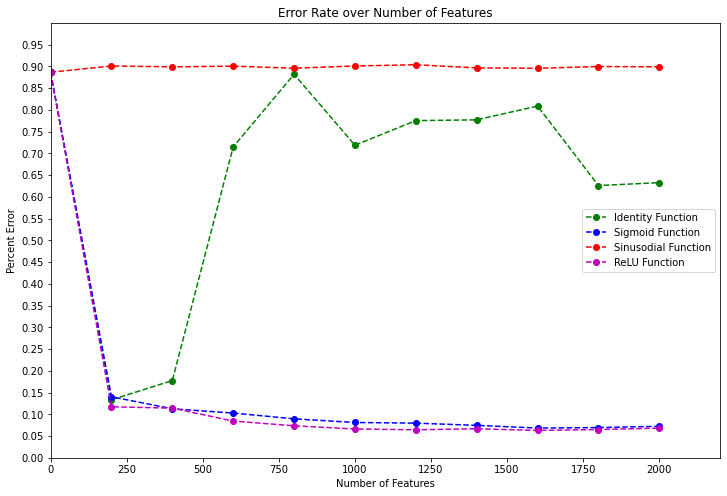

In [146]:
feature_vals = np.arange(0,2200,200)

y = np.arange(0, 1, 0.05)

plt.figure(figsize=(12, 8))

plt.plot(feature_vals, i_error, '--go')
plt.plot(feature_vals, sig_error, '--bo')
plt.plot(feature_vals, sin_error, '--ro')
plt.plot(feature_vals, r_error, '--mo')

plt.xlabel("Number of Features")
plt.ylabel("Percent Error")
plt.title("Error Rate over Number of Features")

plt.yticks(y)

plt.axis([0, 2200, 0, 1]) 
plt.ylim(0,1)
plt.legend(["Identity Function", "Sigmoid Function", "Sinusodial Function", "ReLU Function"])

plt.show()

The effect of adding more features to our classifier model will vary depending on the choice on non-linear function used in the computation of the feature mapping. Initially, with 0 features, the choice offunction does not matter. With zero features, the classifier has an error rate of about 89%. In the case of the Identity function, the error rate drops significantly with 200 features, with an error rate of about 13%, but the error quickly grows as L (the number of features) grows. It maxes out at 1000 features and begins to trend downard as L increases. The Sinusoidal function had a very consistent error rate of about 90% no matter the size of L. The best performing functions were the Sigmoid and ReLU fnctions. As L increases, their error tends to stay low and stagnate around 7%. 